# Sequence Analysis of COVID's DNA and comparison with SARS, MERS, EBOLA, ZIKA and HIV   

#### Importing necessary modules 
Bio modules are for DNA, mRNA, protein analysis andd also for parsing 3D virus structures. Whereas nglview is for visualization purpose.  

In [1]:
from Bio.Seq import Seq 
from Bio.SeqUtils import GC, seq3
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import SeqIO
from collections import Counter
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
import nglview as nv
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Sequence Analysis
+ Compare their DNA sequence and Protein (Amino Acid) sequence
- GC Content
- Freq of Each Amino Acids
+ Find similarity between them
    - Alignment
    - hamming distance

+ 3D structure of each

### DNA sequence for viruses COVID, MERS, SARS, EBOLA, ZIKA and HIV 

### Data Source

Importing necessary data of the mentioned viruses from the ncbi website given below:

#### FASTA files
+ COVID - https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&VirusLineage_ss=Severe%20acute%20respiratory%20syndrome%20coronavirus%202%20(SARS-CoV-2),%20taxid:2697049 

+ MERS - https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&VirusLineage_ss=Middle%20East%20respiratory%20syndrome-related%20coronavirus%20(MERS-CoV),%20taxid:1335626

+ SARS - https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virusSeqType_s=Nucleotide&VirusLineage_ss=SARS%20coronavirus%20Urbani,%20taxid:228330

+ EBOLA - https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&VirusLineage_ss=Ebolavirus,%20taxid:186536

+ ZIKA - https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&VirusLineage_ss=Zika%20virus,%20taxid:64320

+ HIV - https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&VirusLineage_ss=Human%20immunodeficiency%20virus%201%20(HIV-1),%20taxid:11676

#### PDB Files (For 3D structure analysis)
+ COVID (PDB ID: 6LU7) - https://www.ncbi.nlm.nih.gov/Structure/mmdb/mmdbsrv.cgi  
+ MERS (PDB ID: 6WAR) - https://www.ncbi.nlm.nih.gov/Structure/mmdb/mmdbsrv.cgi
+ SARS (PDB ID: 6VXX) - https://www.ncbi.nlm.nih.gov/Structure/mmdb/mmdbsrv.cgi
+ EBOLA (PDB ID: 6NAE) - https://www.ncbi.nlm.nih.gov/Structure/mmdb/mmdbsrv.cgi
+ ZIKA (PDB ID: 6CO8) - https://www.ncbi.nlm.nih.gov/Structure/mmdb/mmdbsrv.cgi
+ HIV (PDB ID: 1DMP) - https://www.ncbi.nlm.nih.gov/Structure/mmdb/mmdbsrv.cgi

In [2]:
COVID = SeqIO.read(r"Data\covid19_sequences.fasta","fasta")
MERS = SeqIO.read(r"Data\mers_sequences.fasta","fasta")
SARS = SeqIO.read(r"Data\sars_sequences.fasta","fasta")
EBOLA = SeqIO.read(r"Data\ebola_sequences.fasta","fasta")
ZIKA = SeqIO.read(r"Data\zika_sequences.fasta","fasta")
HIV = SeqIO.read(r"Data\hiv_sequences.fasta","fasta")

+ After reading the .fasta file using SeqIO reader, it contains all type of data along with the genomic sequence. For  analysis purpose we are mostly interested in the genomic sequence of the virus's DNA. To ensure this, .seq method is used to access only the genomic data and copy that data to a variable.   
+ First 10 characters of the DNA sequence are printed for visualization of data. It can be seen that the data contains nucleotides A,T,C,G thus ensuring that the sequence is a DNA sequence and not a RNA sequence. In RNA sequence nucleotides T is absent and is replaced by U.
+ In DNA the nucleotide are:
    - A : adenine
    - C : cytosine
    - G : guanine
    - T : thymine
+ Here, A and T forms a pair by double bond whereas C and G forms a pair having a triple bond.  

<img src="600px-AT-GC.jpg">

In [3]:
COVID_sequence = COVID.seq
MERS_sequence = MERS.seq
SARS_sequence = SARS.seq
EBOLA_sequence = EBOLA.seq
ZIKA_sequence = ZIKA.seq 
HIV_sequence = HIV.seq 

print("First 10 nucleotides in DNA sequence of COVID DNA are : ",COVID_sequence[:10])
print("First 10 nucleotides in DNA sequence of MERS DNA are : ",MERS_sequence[:10])
print("First 10 nucleotides in DNA sequence of SARS DNA are : ",SARS_sequence[:10])
print("First 10 nucleotides in DNA sequence of EBOLA DNA are : ",EBOLA_sequence[:10])
print("First 10 nucleotides in DNA sequence of ZIKA DNA are : ",ZIKA_sequence[:10])
print("First 10 nucleotides in DNA sequence of HIV DNA are : ",HIV_sequence[:10])

First 10 nucleotides in DNA sequence of COVID DNA are :  ATTAAAGGTT
First 10 nucleotides in DNA sequence of MERS DNA are :  ATTTAAGTGA
First 10 nucleotides in DNA sequence of SARS DNA are :  ATATTAGGTT
First 10 nucleotides in DNA sequence of EBOLA DNA are :  CGGACACACA
First 10 nucleotides in DNA sequence of ZIKA DNA are :  AGTTGTTGAT
First 10 nucleotides in DNA sequence of HIV DNA are :  GGTCTCTCTG


### Length of the sequence and it's GC content
+ GC content of a DNA is an important criteria for accessing the stability of the DNA. Higher the GC pairs, more stable is the DNA. Also, a higher GC-content level indicates a relatively higher melting temperature. Thus, Under pressure, such as when exposed to heat, the GC-rich sequences can take far more abuse than GC-low sequences.

GC-content is usually expressed as a percentage value, but sometimes as a ratio (called G+C ratio or GC-ratio). GC-content percentage is calculated as: 

<img src="GC_ratio.png">

whereas the AT/GC ratio is calculated as,

<img src="AT_GC_ratio.png">


In [4]:
print("Length of COVID sequence is : ",len(COVID_sequence))
print("Length of MERS sequence is : ",len(MERS_sequence))
print("Length of SARS sequence is : ",len(SARS_sequence))
print("Length of EBOLA sequence is : ",len(EBOLA_sequence))
print("Length of ZIKA sequence is : ",len(ZIKA_sequence))
print("Length of HIV sequence is : ",len(HIV_sequence))

Length of COVID sequence is :  29903
Length of MERS sequence is :  30111
Length of SARS sequence is :  29730
Length of EBOLA sequence is :  19043
Length of ZIKA sequence is :  10808
Length of HIV sequence is :  9181


In [5]:
print("Number of GC pair in COVID sequence is : ",GC(COVID_sequence))
print("Number of GC pair in SARS sequence is : ",GC(SARS_sequence))
print("Number of GC pair in MERS sequence is : ",GC(MERS_sequence))
print("Number of GC pair in EBOLA sequence is : ",GC(EBOLA_sequence))
print("Number of GC pair in ZIKA sequence is : ",GC(ZIKA_sequence))
print("Number of GC pair in HIV sequence is : ",GC(HIV_sequence))

Number of GC pair in COVID sequence is :  37.97277865097148
Number of GC pair in SARS sequence is :  40.840901446350486
Number of GC pair in MERS sequence is :  41.17764272192886
Number of GC pair in EBOLA sequence is :  45.48127921020848
Number of GC pair in ZIKA sequence is :  51.258327165062916
Number of GC pair in HIV sequence is :  42.119594815379585


### Conversion of DNA to Proteins/ Ammino Acids(AA) 

<img src="DNA2proteins.jpg">

+ The process of going from DNA to a complete protein is called protein biosynthesis and it is composed of two different stages. 
+ The first stage is called transcription. This is where a strand of double helix DNA (a gene) is unwound so that one side can be read by an enzyme called RNA polymerase.
+ The second part of the process is called translation.  This is where the mRNA leaves the DNA in the nucleus and travels to a part of the cell called a ribosome.  This is where the actual protein is built from individual amino acids.  The nucleotides in the mRNA are read as groups of three called codons.  Each codon corresponds to a particular amino acid.

Proteins analysis forms an important part of sequence analysis. A good way to study the function of protein is to remove the proteins and observe its effects in the cell. For this it is necessary to convert the DNA sequence to protein sequence. After obtaining the protein sequence, analysis can be done based on the proteins and it's frequency. The frequency of a certain protein affects the behavioural pattern and the characterstics of the virus. Furthermore, virusus of same category have close resemblance in the frequency of the contained protein. Though, its not necessary.

The below cells converts the DNA sequence to mRNA and then to AA using first transcription and then translation as explained above.

In [6]:
COVID_mRNA = COVID_sequence.transcribe()
SARS_mRNA = SARS_sequence.transcribe()
MERS_mRNA = MERS_sequence.transcribe()
EBOLA_mRNA = EBOLA_sequence.transcribe()
ZIKA_mRNA = ZIKA_sequence.transcribe()
HIV_mRNA = HIV_sequence.transcribe()

print("Number of necleutides in mRNA sequence of COVID is : ",len(COVID_mRNA))
print("Number of necleutides in mRNA sequence of SARS is : ",len(SARS_mRNA))
print("Number of necleutides in mRNA sequence of MERS is : ",len(MERS_mRNA))
print("Number of necleutides in mRNA sequence of EBOLA is : ",len(EBOLA_mRNA))
print("Number of necleutides in mRNA sequence of ZIKA is : ",len(ZIKA_mRNA))
print("Number of necleutides in mRNA sequence of HIV is : ",len(HIV_mRNA))

Number of necleutides in mRNA sequence of COVID is :  29903
Number of necleutides in mRNA sequence of SARS is :  29730
Number of necleutides in mRNA sequence of MERS is :  30111
Number of necleutides in mRNA sequence of EBOLA is :  19043
Number of necleutides in mRNA sequence of ZIKA is :  10808
Number of necleutides in mRNA sequence of HIV is :  9181


As it can be seen that each condon contains 3 nucleotides number of proteins are approximately equal to number of nucleotides divide by 3. As in case of COVID, Number of nucleotides are 29903, thus number of protein sequence should be 29903/3 = 9967. Which can be verified as below. Similarly, same rule applies for other virusus.

In [7]:
COVID_proteins = COVID_mRNA.translate()
SARS_proteins = SARS_mRNA.translate()
MERS_proteins = MERS_mRNA.translate()
EBOLA_proteins = EBOLA_mRNA.translate()
ZIKA_proteins = ZIKA_mRNA.translate()
HIV_proteins = HIV_mRNA.translate()

print("Number of proteins in COVID are : ",len(COVID_proteins))
print("Number of proteins in SARS are : ",len(SARS_proteins))
print("Number of proteins in MERS are : ",len(MERS_proteins))
print("Number of proteins in EBOLA are : ",len(EBOLA_proteins))
print("Number of proteins in ZIKA are : ",len(ZIKA_proteins))
print("Number of proteins in HIV are : ",len(HIV_proteins))

Number of proteins in COVID are :  9967
Number of proteins in SARS are :  9910
Number of proteins in MERS are :  10037
Number of proteins in EBOLA are :  6347
Number of proteins in ZIKA are :  3602
Number of proteins in HIV are :  3060


Below cell shows, example of DNA, mRNA and protein chain in COVID virus(First 10 characters).

There are 20 types of proteins denoted by symbols,
+ alanine - ala - A 
+ arginine - arg - R 
+ asparagine - asn - N 
+ aspartic acid - asp - D 
+ cysteine - cys - C 
+ glutamine - gln - Q 
+ glutamic acid - glu - E 
+ glycine - gly - G 
+ histidine - his - H 
+ isoleucine - ile - I 
+ leucine - leu - L 
+ lysine - lys - K 
+ methionine - met - M 
+ phenylalanine - phe - F 
+ proline - pro - P 
+ serine - ser - S 
+ threonine - thr - T 
+ tryptophan - trp - W 
+ tyrosine - tyr - Y 
+ valine - val - V 

In [8]:
print("DNA sequence for COVID is : ",COVID_sequence[:10])
print("mRNA sequence for COVID is : ",COVID_mRNA[:10])
print("Protein/AA sequence for COVID is : ",COVID_proteins[:10])

DNA sequence for COVID is :  ATTAAAGGTT
mRNA sequence for COVID is :  AUUAAAGGUU
Protein/AA sequence for COVID is :  IKGLYLPR*Q


### Protein Analysis 

In protein sequence, * represents a stop condon. All the sequences before the stop condon are given below using pandas.   

In [9]:
COVID_sequenceBeforeStopCondon = COVID_proteins.split('*')
COVID_sequenceBeforeStopCondon = [str(i) for i in COVID_sequenceBeforeStopCondon]
Data_frame = pd.DataFrame({'Ammino Acids':COVID_sequenceBeforeStopCondon})
Data_frame['count'] = Data_frame['Ammino Acids'].str.len()

Data_frame.nlargest(5,'count')

,Ammino Acids,count
548,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
694,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
719,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
695,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
718,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63


In [10]:
Data_frame

,Ammino Acids,count
0,IKGLYLPR,8
1,QTNQLSISCRSVL,13
2,TNFKICVAVTRLHA,14
3,CTHAV,5
4,LITNYCR,7
...,...,...
770,SHIAIFNQCVTLGRT,15
771,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43
772,F,1
773,,0


In the below cells, the frequncy of proteins in the sequence are calculated for each virus and then plotted on the line graph for visualization purpose.  

In [11]:
COVID_ProteinAnalysis = ProteinAnalysis(str(COVID_proteins))
MERS_ProteinAnalysis = ProteinAnalysis(str(MERS_proteins))
SARS_ProteinAnalysis = ProteinAnalysis(str(SARS_proteins))
EBOLA_ProteinAnalysis = ProteinAnalysis(str(EBOLA_proteins))
ZIKA_ProteinAnalysis = ProteinAnalysis(str(ZIKA_proteins))
HIV_ProteinAnalysis = ProteinAnalysis(str(HIV_proteins))

In [12]:
# Frequrency of Ammino Acids 

COVID_PROTEINS = COVID_ProteinAnalysis.count_amino_acids()
MERS_PROTEINS = MERS_ProteinAnalysis.count_amino_acids()
SARS_PROTEINS = SARS_ProteinAnalysis.count_amino_acids()
EBOLA_PROTEINS = EBOLA_ProteinAnalysis.count_amino_acids()
ZIKA_PROTEINS = ZIKA_ProteinAnalysis.count_amino_acids()
HIV_PROTEINS = HIV_ProteinAnalysis.count_amino_acids()

print(COVID_PROTEINS)

{'A': 375, 'C': 635, 'D': 290, 'E': 270, 'F': 593, 'G': 394, 'H': 332, 'I': 436, 'K': 413, 'L': 886, 'M': 117, 'N': 472, 'P': 292, 'Q': 325, 'R': 558, 'S': 810, 'T': 679, 'V': 548, 'W': 263, 'Y': 505}


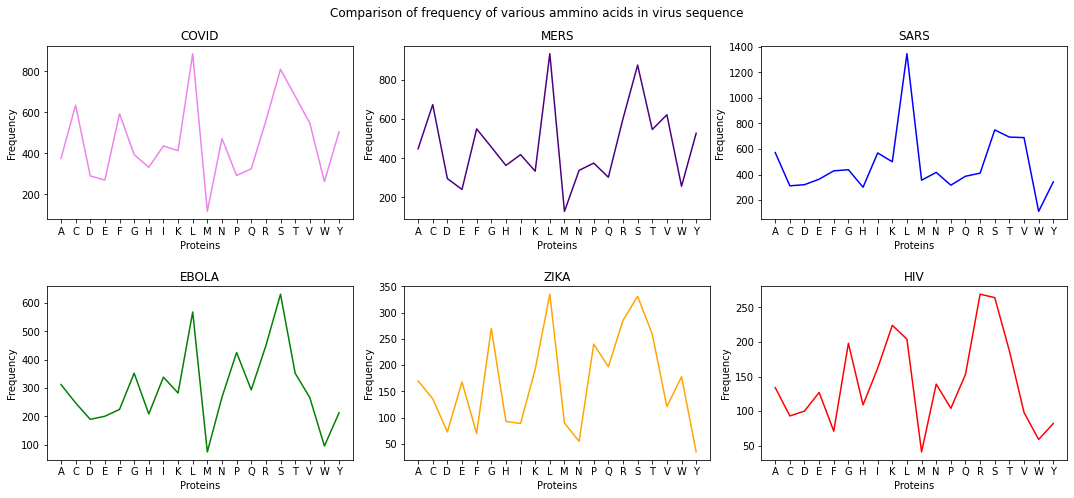

In [13]:
Lables=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
COVID_PROTEINS_values = list(COVID_PROTEINS.values())
MERS_PROTEINS_values = list(MERS_PROTEINS.values())
SARS_PROTEINS_values = list(SARS_PROTEINS.values())
EBOLA_PROTEINS_values = list(EBOLA_PROTEINS.values())
ZIKA_PROTEINS_values = list(ZIKA_PROTEINS.values())
HIV_PROTEINS_values = list(HIV_PROTEINS.values())

fig=plt.figure(figsize=(15,7))
fig.suptitle('Comparison of frequency of various ammino acids in virus sequence')

ax1=fig.add_subplot(231)
ax1.set_title('COVID')
plt.xlabel("Proteins")
plt.ylabel("Frequency")
ax1.plot(Lables,COVID_PROTEINS_values,color='violet')


ax2=fig.add_subplot(232)
ax2.set_title('MERS')
plt.xlabel("Proteins")
plt.ylabel("Frequency")
ax2.plot(Lables,MERS_PROTEINS_values,color='indigo')

ax3=fig.add_subplot(233)
ax3.set_title('SARS')
plt.xlabel("Proteins")
plt.ylabel("Frequency")
ax3.plot(Lables,SARS_PROTEINS_values,color='blue')

ax4=fig.add_subplot(234)
ax4.set_title('EBOLA')
plt.xlabel("Proteins")
plt.ylabel("Frequency")
ax4.plot(Lables,EBOLA_PROTEINS_values,color='green')

ax5=fig.add_subplot(235)
ax5.set_title('ZIKA')
plt.xlabel("Proteins")
plt.ylabel("Frequency")
ax5.plot(Lables,ZIKA_PROTEINS_values,color='orange')

ax6=fig.add_subplot(236)
ax6.set_title('HIV')
plt.xlabel("Proteins")
plt.ylabel("Frequency")
ax6.plot(Lables,HIV_PROTEINS_values,color='red')

plt.tight_layout(pad=1, w_pad=0.5, h_pad=2.0)

### Calculating the similarity Index of COVID with other viruses  

+ Similarity index between two sequences is calculated as : fraction of nucleotides that is the same/ total number of nucleotides * 100%
+ Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. 
+ In other words, it measures the minimum number of substitutions required to change one string into the other, or the minimum number of errors that could have transformed one string into the othe
+ It is used for error detection or error correction
+ It is used to quantify the similarity of DNA sequences,
+ For checking the edit distance
 - edit distance is a way of quantifying how dissimilar two strings (e.g., words) are to one another by counting the minimum number of operations required to transform one string into the other. 
 - eg Levenshtein distance
 
From the below cell it can be seen that the similarity index of COVID with SARS is more than that of EBOLA, ZIKA or HIV. This shows that the COVID and SARS belong to the same family. Thus have greater similar nucleotides that the other virusus. 

In [14]:
COVID_n_MERS = pairwise2.align.globalxx(COVID_sequence,MERS_sequence, one_alignment_only=True, score_only=True) 
Similarity_with_MERS = COVID_n_MERS/max(len(COVID_sequence),len(MERS_sequence)) * 100

COVID_n_SARS = pairwise2.align.globalxx(COVID_sequence,SARS_sequence, one_alignment_only=True, score_only=True)
Similarity_with_SARS = COVID_n_SARS/max(len(COVID_sequence),len(SARS_sequence)) * 100

COVID_n_EBOLA = pairwise2.align.globalxx(COVID_sequence,EBOLA_sequence, one_alignment_only=True, score_only=True)
Similarity_with_EBOLA = COVID_n_EBOLA/max(len(COVID_sequence),len(EBOLA_sequence)) * 100

COVID_n_ZIKA = pairwise2.align.globalxx(COVID_sequence,ZIKA_sequence, one_alignment_only=True, score_only=True)
Similarity_with_ZIKA = COVID_n_ZIKA/max(len(COVID_sequence),len(ZIKA_sequence)) * 100

COVID_n_HIV = pairwise2.align.globalxx(COVID_sequence,HIV_sequence, one_alignment_only=True, score_only=True)
Similarity_with_HIV = COVID_n_HIV/max(len(COVID_sequence),len(HIV_sequence)) * 100

print("Similarity index of COVID with MERS virus is : ",Similarity_with_MERS)
print("Similarity index of COVID with SARS virus is : ",Similarity_with_SARS)
print("Similarity index of COVID with EBOLA virus is : ",Similarity_with_EBOLA)
print("Similarity index of COVID with ZIKA virus is : ",Similarity_with_ZIKA)
print("Similarity index of COVID with HIV virus is : ",Similarity_with_HIV)

Similarity index of COVID with MERS virus is :  69.4065291753844
Similarity index of COVID with SARS virus is :  82.83784235695416
Similarity index of COVID with EBOLA virus is :  50.443099354579815
Similarity index of COVID with ZIKA virus is :  34.07684847674146
Similarity index of COVID with HIV virus is :  30.140788549643847


### 3D structures of the given viruses 

+ Below cell reads the PDB file using the PDB reader. The files can be found on the links given above. nglview is used to display the 3D structure. Based on this structure lot of information based orientation and connectivity of various elements can be found out. It is crutial information for studying protein folding, evolution, function prediction etc. 

In [15]:
COVID_structure = PDBParser().get_structure("COVID_6lu7","Data\COVID_6lu7.pdb") 
MERS_structure = PDBParser().get_structure("MERS_6lu7","Data\MERS_6war.pdb")
SARS_structure = PDBParser().get_structure("SARS_6lu7","Data\SARS_6vxx.pdb")
EBOLA_structure = PDBParser().get_structure("EBOLA_6lu7","Data\EBOLA_6nae.pdb")
ZIKA_structure = PDBParser().get_structure("ZIKA_6lu7","Data\ZIKA_6co8.pdb")
HIV_structure = PDBParser().get_structure("HIV_6lu7","Data\HIV_1dmp.pdb")

In [16]:
COVID3D = nv.show_biopython(COVID_structure)
MERS3D = nv.show_biopython(MERS_structure)                                             
SARS3D = nv.show_biopython(SARS_structure)
EBOLA3D = nv.show_biopython(EBOLA_structure)
ZIKA3D = nv.show_biopython(ZIKA_structure)
HIV3D = nv.show_biopython(HIV_structure)

In [17]:
COVID3D

NGLWidget()

In [18]:
MERS3D

NGLWidget()

In [19]:
SARS3D

NGLWidget()

In [20]:
EBOLA3D

NGLWidget()

In [21]:
ZIKA3D

NGLWidget()

In [22]:
HIV3D

NGLWidget()